In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
data = pd.read_csv('/content/WineQT.csv', sep=';')

# Display the first few rows
print(data.head())
print(data.columns)


  fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0  7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0....                                                                                                  
1  7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0....                                                                                                  
2  7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0...                                                                                                  
3  11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,...                                                                                                  
4  7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0....                                                                                                  
Index(['fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxid

In [ ]:
# Load the dataset
data = pd.read_csv('/content/WineQT.csv', sep=';')

# Check and clean column names
data.columns = data.columns.str.strip()  # Trim whitespace from column names
print(data.columns)  # Print column names to check

# Separate features and target
try:
    X = data.drop('quality', axis=1)  # Features
    y = data['quality']  # Target variable
except KeyError as e:
    print(f"KeyError: {e}. Please check the column names.")

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Index(['fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id'], dtype='object')
KeyError: "['quality'] not found in axis". Please check the column names.


NameError: name 'X' is not defined

In [ ]:
# Load the dataset with the correct separator
data = pd.read_csv('/content/WineQT.csv', sep=',')  # Adjusting the separator

# Check the column names and the first few rows
data.columns = data.columns.str.strip()  # Trim whitespace
print(data.columns)  # Print column names
print(data.head())  # Display the first few rows

# Separate features and target
try:
    X = data.drop('quality', axis=1)  # Features
    y = data['quality']  # Target variable
except KeyError as e:
    print(f"KeyError: {e}. Please check the column names.")

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3  

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Create the SVM model
model = SVC(kernel='linear', C=1.0)

# Train the model
model.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 0  3  3  0  0]
 [ 0 73 22  1  0]
 [ 0 30 62  7  0]
 [ 0  2 19  5  0]
 [ 0  0  0  2  0]]

Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.76      0.72        96
           6       0.58      0.63      0.60        99
           7       0.33      0.19      0.24        26
           8       0.00      0.00      0.00         2

    accuracy                           0.61       229
   macro avg       0.32      0.32      0.31       229
weighted avg       0.57      0.61      0.59       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


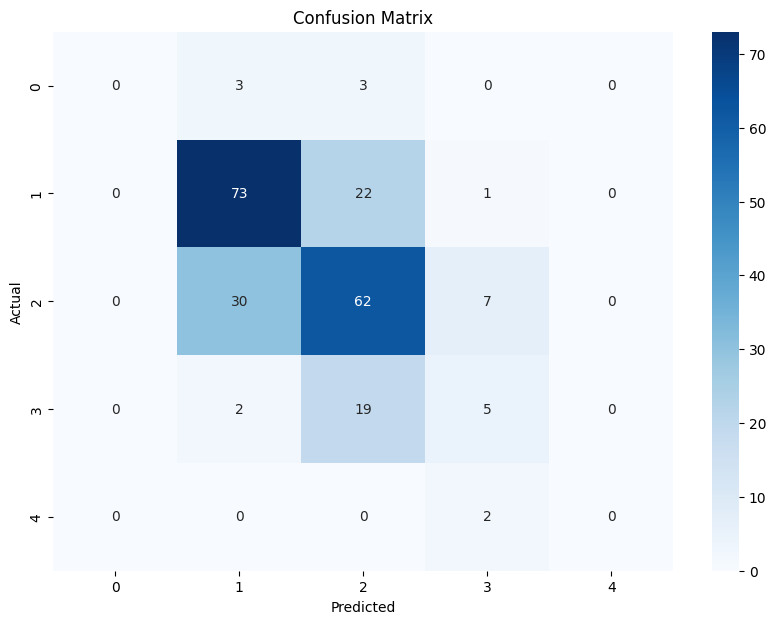

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
